https://takeshiwada1980.github.io/Programming1-2023/lecture19.html

In [2]:
%reset -f
s = input()        # スペース区切りで数値入力 例:「10 20 30」
# print(type(s))   # => <class 'str'>
ss = s.split()
# print(type(ss))  # => <class 'str'>
a, b, c = map(float, ss) # リスト ss に対する map 関数の利用
# print(type(a))   # => <class 'float'>
print(a)
print(b)
print(c)

10.0
20.0
30.0


In [6]:
%reset -f
# 関数の定義
def add(a,b):
  return a+b  # return を「省略」

# 関数の呼び出し
z = add(10,20)
print(z)

30


In [7]:
%reset -f
def add(a,b):
  return a+b

def subtract(a,b):
  return a-b

calc = {} # 空の辞書 
calc['加算']=add       # 関数を辞書の「値」として登録
calc['減算']=subtract  # 〃

z1 = calc['加算'](10,20) # 辞書から関数を呼び出し
z2 = calc['減算'](10,20) # 〃
print(f'z1 => {z1}')
print(f'z2 => {z2}')

z1 => 30
z2 => -10


In [9]:
%reset -f
calc = {}
calc['加算']= lambda a,b : a + b
calc['減算']= lambda a,b : a - b
calc['乗算']= lambda a,b : a * b

z1 = calc['加算'](10,20)
z2 = calc['減算'](10,20)
z3 = calc['乗算'](10,20)
print(calc)
print(f'z1 => {z1},  z2 => {z2},  z3 => {z3}')

{'加算': <function <lambda> at 0x000001D2BA072B60>, '減算': <function <lambda> at 0x000001D2B8279620>, '乗算': <function <lambda> at 0x000001D2BB13FA60>}
z1 => 30,  z2 => -10,  z3 => 200


In [11]:
add = lambda (a,b) : a+b
print(type(add))  # => <class 'function'>
print(add(10,20)) # => 30

SyntaxError: Lambda expression parameters cannot be parenthesized (3832807797.py, line 1)

In [12]:
arr1=['10','20','30','40']
print(type(arr1[0])) # => <class 'str'>

<class 'str'>


In [13]:
# map を適用
arr2 = map(int, arr1)
print(type(arr2))    # => <class 'map'>

# map型をリスト型に変換
arr2 = list(arr2)

print(type(arr2))    # => <class 'list'>
print(type(arr2[0])) # => <class 'int'>

<class 'map'>
<class 'list'>
<class 'int'>


In [14]:
%reset -f

# 値を2倍にする関数
def double(a):
  return a*2

arr = ['10','20','30','40']
arr = list(map(int, arr))   # 標準関数 int を適用し...
arr = list(map(double,arr)) # 自作関数 double を適用
print(arr) # => [20, 40, 60, 80]

[20, 40, 60, 80]


In [15]:
%reset -f
arr = ['10','20','30','40']
arr = list(map(int, arr))
arr = list(map( lambda a : 2*a, arr)) 
print(arr) # => [20, 40, 60, 80]

[20, 40, 60, 80]


In [19]:
%reset -f
import random as r
dice = r.randint(1,6) # 1～6の整数乱数
a = '丁(偶数)' if dice%2==0 else '半(奇数)' # 条件式 (三項演算子)
print(f'賽の目 {dice} で {a} です')

賽の目 4 で 丁(偶数) です


In [23]:
print('偶数') if int(input())%2==0 else print('奇数')

奇数


In [22]:
%reset -f
arr1 = [60, 70, 45, 55, 90]
arr2 = list(map( lambda a: '合格' if a>=60 else '不合格' ,arr1))
print(arr2) # => ['合格', '合格', '不合格', '不合格', '合格']

['合格', '合格', '不合格', '不合格', '合格']


In [26]:
import os
import requests  # ウェブからファイルをダウンロードする際に利用
import pandas as pd

# CSVファイルをウェブから取得してカレントフォルダに保存
url = 'https://takeshiwada1980.github.io/Programming1-2023/data/19/score-1.csv'
res = requests.get(url)
# print(type(res)) # => <class 'requests.models.Response'>

if res.status_code != 200:
  raise Exception(f'ファイルのDLに失敗。強制終了します。Code:{res.status_code}')

fn = 'score-1.csv'
with open(fn,'wb') as file: 
  file.write(res.content)

# CSVファイルの読込み
assert os.path.isfile(fn)
df = pd.read_csv(fn,encoding='cp932')
# print(type(df)) # => <class 'pandas.core.frame.DataFrame'>

# データフレームの整形出力
print(df)

UnicodeDecodeError: 'cp932' codec can't decode byte 0xef in position 0: illegal multibyte sequence

In [27]:
%reset -f
import pandas as pd

fn = 'score-1.csv'
df = pd.read_csv(fn,encoding='utf-8')
print(df.dtypes)

ID      int64
氏名     object
性別     object
国語      int64
数学     object
英語      int64
理科      int64
社会    float64
備考     object
dtype: object


In [32]:
%reset -f
import pandas as pd

fn = 'score-1.csv'
df = pd.read_csv(fn,encoding='utf-8')
df.set_index('氏名',inplace=True) # 列「氏名」をインデックスに設定
display(df)

,ID,性別,国語,数学,英語,理科,社会,備考
氏名,,,,,,,,
相田 ケンスケ,1,男,70,80,80,90,90.0,NaN
綾波 レイ,2,女,50,欠,80,70,50.0,数学試験は欠席
碇 シンジ,3,男,65,50,70,75,65.0,NaN
鈴原 トウジ,4,男,40,35,40,65,50.0,NaN
惣流 アスカ,5,女,50,100,100,95,55.0,日本語の読み書ききに難あり
渚 カヲル,6,男,77,77,77,77,77.0,NaN
洞木 ヒカリ,7,女,80,50,85,70,90.5,NaN
真希波 マリ,8,女,95,100,100,90,95.0,NaN


In [33]:
%reset -f
import pandas as pd
import numpy as np   # 要インポート

fn = 'score-1.csv'
df = pd.read_csv(fn,encoding='utf-8')
df.set_index('氏名',inplace=True)
df.loc['綾波 レイ','数学'] = np.nan  # インデックスと列名で位置を指定して値を変更
display(df)

,ID,性別,国語,数学,英語,理科,社会,備考
氏名,,,,,,,,
相田 ケンスケ,1,男,70,80,80,90,90.0,NaN
綾波 レイ,2,女,50,NaN,80,70,50.0,数学試験は欠席
碇 シンジ,3,男,65,50,70,75,65.0,NaN
鈴原 トウジ,4,男,40,35,40,65,50.0,NaN
惣流 アスカ,5,女,50,100,100,95,55.0,日本語の読み書ききに難あり
渚 カヲル,6,男,77,77,77,77,77.0,NaN
洞木 ヒカリ,7,女,80,50,85,70,90.5,NaN
真希波 マリ,8,女,95,100,100,90,95.0,NaN


In [35]:
%reset -f
import pandas as pd
import numpy as np

fn = 'score-1.csv'
df = pd.read_csv(fn,encoding='utf-8')
df.set_index('氏名',inplace=True)
df.loc['綾波 レイ','数学'] = np.nan

# 列の型変換
df['国語'] = df['国語'].astype(float) # int64  -> float64
df['数学'] = df['数学'].astype(float) # object -> float64
df['英語'] = df['英語'].astype(float) # int64  -> float64
df['理科'] = df['理科'].astype(float) #  〃

# 不要列の削除
df.drop(['ID','備考'], axis='columns', inplace=True)

print(df.dtypes)         # 各列の型確認
display(df)              # 内容確認
df.to_csv('score-2.csv') # 保存

性別     object
国語    float64
数学    float64
英語    float64
理科    float64
社会    float64
dtype: object


,性別,国語,数学,英語,理科,社会
氏名,,,,,,
相田 ケンスケ,男,70.0,80.0,80.0,90.0,90.0
綾波 レイ,女,50.0,NaN,80.0,70.0,50.0
碇 シンジ,男,65.0,50.0,70.0,75.0,65.0
鈴原 トウジ,男,40.0,35.0,40.0,65.0,50.0
惣流 アスカ,女,50.0,100.0,100.0,95.0,55.0
渚 カヲル,男,77.0,77.0,77.0,77.0,77.0
洞木 ヒカリ,女,80.0,50.0,85.0,70.0,90.5
真希波 マリ,女,95.0,100.0,100.0,90.0,95.0


In [36]:
%reset -f
import pandas as pd
fn = 'score-2.csv'
df = pd.read_csv(fn,encoding='utf-8',index_col='氏名')
print(df.dtypes)
display(df)

性別     object
国語    float64
数学    float64
英語    float64
理科    float64
社会    float64
dtype: object


,性別,国語,数学,英語,理科,社会
氏名,,,,,,
相田 ケンスケ,男,70.0,80.0,80.0,90.0,90.0
綾波 レイ,女,50.0,NaN,80.0,70.0,50.0
碇 シンジ,男,65.0,50.0,70.0,75.0,65.0
鈴原 トウジ,男,40.0,35.0,40.0,65.0,50.0
惣流 アスカ,女,50.0,100.0,100.0,95.0,55.0
渚 カヲル,男,77.0,77.0,77.0,77.0,77.0
洞木 ヒカリ,女,80.0,50.0,85.0,70.0,90.5
真希波 マリ,女,95.0,100.0,100.0,90.0,95.0


In [37]:
%reset -f
import pandas as pd
fn = 'score-2.csv'
df = pd.read_csv(fn,encoding='utf-8',index_col='氏名')
display(df.describe()) # 要約統計量の表示

,国語,数学,英語,理科,社会
count,8.000000,7.000000,8.00000,8.000000,8.000000
mean,65.875000,70.285714,79.00000,79.000000,71.562500
std,18.372631,25.733987,18.99624,11.186727,18.991422
min,40.000000,35.000000,40.00000,65.000000,50.000000
25%,50.000000,50.000000,75.25000,70.000000,53.750000
50%,67.500000,77.000000,80.00000,76.000000,71.000000
75%,77.750000,90.000000,88.75000,90.000000,90.125000
max,95.000000,100.000000,100.00000,95.000000,95.000000


<Axes: ylabel='氏名'>

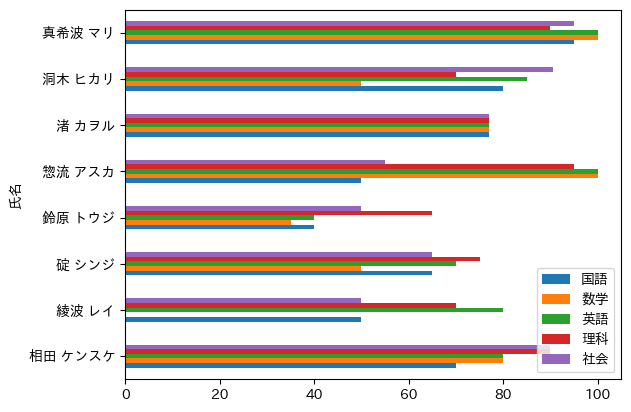

In [38]:
%reset -f
import pandas as pd
import japanize_matplotlib # 日本語対応
fn = 'score-2.csv'
df = pd.read_csv(fn,encoding='utf-8',index_col='氏名')
df.plot.barh() # 水平の棒グラフ (簡易)

In [39]:
%reset -f
import pandas as pd
fn = 'score-2.csv'
df = pd.read_csv(fn,encoding='utf-8',index_col='氏名')
df2 = df[['性別','数学','理科']] # サブセットの作成
display(df2)

,性別,数学,理科
氏名,,,
相田 ケンスケ,男,80.0,90.0
綾波 レイ,女,NaN,70.0
碇 シンジ,男,50.0,75.0
鈴原 トウジ,男,35.0,65.0
惣流 アスカ,女,100.0,95.0
渚 カヲル,男,77.0,77.0
洞木 ヒカリ,女,50.0,70.0
真希波 マリ,女,100.0,90.0


In [40]:
%reset -f
import pandas as pd

fn = 'score-2.csv'
df = pd.read_csv(fn,encoding='utf-8',index_col='氏名')

subjects = ['国語','数学','英語','理科','社会'] 
df['合計'] = df[subjects].sum(axis='columns')
df['平均点'] = df[subjects].mean(axis='columns')
df['欠点科目数'] = (df[subjects] < 60).sum(axis='columns')
display(df)

,性別,国語,数学,英語,理科,社会,合計,平均点,欠点科目数
氏名,,,,,,,,,
相田 ケンスケ,男,70.0,80.0,80.0,90.0,90.0,410.0,82.0,0
綾波 レイ,女,50.0,NaN,80.0,70.0,50.0,250.0,62.5,2
碇 シンジ,男,65.0,50.0,70.0,75.0,65.0,325.0,65.0,1
鈴原 トウジ,男,40.0,35.0,40.0,65.0,50.0,230.0,46.0,4
惣流 アスカ,女,50.0,100.0,100.0,95.0,55.0,400.0,80.0,2
渚 カヲル,男,77.0,77.0,77.0,77.0,77.0,385.0,77.0,0
洞木 ヒカリ,女,80.0,50.0,85.0,70.0,90.5,375.5,75.1,1
真希波 マリ,女,95.0,100.0,100.0,90.0,95.0,480.0,96.0,0


In [45]:
df2 = df[subjects] < 60

df['欠点科目数'] = df2.sum(axis='columns')
df['理系科目平均'] = df[['理科','数学']].mean(axis='columns').round(1)
df['文系科目平均'] = df[['英語','社会','国語']].mean(axis='columns').round(1)
display(df)

,性別,国語,数学,英語,理科,社会,合計,平均点,欠点科目数,理系科目平均,文系科目平均
氏名,,,,,,,,,,,
相田 ケンスケ,男,70.0,80.0,80.0,90.0,90.0,410.0,82.0,0,85.0,80.0
綾波 レイ,女,50.0,NaN,80.0,70.0,50.0,250.0,62.5,2,70.0,60.0
碇 シンジ,男,65.0,50.0,70.0,75.0,65.0,325.0,65.0,1,62.5,66.7
鈴原 トウジ,男,40.0,35.0,40.0,65.0,50.0,230.0,46.0,4,50.0,43.3
惣流 アスカ,女,50.0,100.0,100.0,95.0,55.0,400.0,80.0,2,97.5,68.3
渚 カヲル,男,77.0,77.0,77.0,77.0,77.0,385.0,77.0,0,77.0,77.0
洞木 ヒカリ,女,80.0,50.0,85.0,70.0,90.5,375.5,75.1,1,60.0,85.2
真希波 マリ,女,95.0,100.0,100.0,90.0,95.0,480.0,96.0,0,95.0,96.7


In [46]:
%reset -f
import pandas as pd

fn = 'score-2.csv'
df = pd.read_csv(fn,encoding='utf-8',index_col='氏名')

subjects = ['国語','数学','英語','理科','社会']
df2 = df[subjects].applymap(lambda p: '合格' if p >=60 else '不合格' )
display(df2)
# display(df) # df は影響を受けていない。

C:\Users\daban\AppData\Local\Temp\ipykernel_16116\3775860080.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df2 = df[subjects].applymap(lambda p: '合格' if p >=60 else '不合格' )


,国語,数学,英語,理科,社会
氏名,,,,,
相田 ケンスケ,合格,合格,合格,合格,合格
綾波 レイ,不合格,不合格,合格,合格,不合格
碇 シンジ,合格,不合格,合格,合格,合格
鈴原 トウジ,不合格,不合格,不合格,合格,不合格
惣流 アスカ,不合格,合格,合格,合格,不合格
渚 カヲル,合格,合格,合格,合格,合格
洞木 ヒカリ,合格,不合格,合格,合格,合格
真希波 マリ,合格,合格,合格,合格,合格


In [ ]:
def grade_converter(p):
  if p >= 60 :
    return '合格'
  else :
    return '不合格'

In [47]:
print(df2.dtypes)

国語    object
数学    object
英語    object
理科    object
社会    object
dtype: object
